In [1]:
%pip install transformers 
%pip install datasets 
%pip install scikit-learn
%pip install torch
%pip install datasets
%pip install accelerate

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

### **1. Loading the Data**
In this part, we load the dataset from a CSV file and preprocess it. We also convert the difficulty levels into numeric labels for classification.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict

file_path = "./Data/combined_balanced_CEFR_sentences.csv"

# Load your dataset
data = pd.read_csv(file_path)

# Create a new coloumn to store the difficulty labels
data["difficulty_label"] = data["difficulty"]

# Convert difficulty column to numeric labels
data["difficulty"] = data["difficulty"].astype("category").cat.codes

# Display the first few rows of the dataset
display(data.head(10))

# Display the number of samples in each difficulty category
data["difficulty"].value_counts()

/Users/dimitriroulin/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


,sentence,difficulty,sentence_length,difficulty_label
0,Der Tierarzt sieht den Vogel an.,0,6,A1
1,"Schönen Merlan mitnehmen hier, für zehn Euro h...",0,8,A1
2,Das wollen sie feiern.,0,4,A1
3,Sie kommt heute mit.,0,4,A1
4,Lena legt die Tasche auf den Boden.,0,7,A1
5,Alexander geht in sein Zimmer.,0,5,A1
6,Eine Polizistin öffnet die Tür.,0,5,A1
7,„Ich höre etwas.,0,3,A1
8,Manchmal haben die Kunden eine Frage.,0,6,A1
9,Oder können Sie backen?,0,4,A1


difficulty
0    543
1    543
2    543
3    543
4    543
5    543
Name: count, dtype: int64

### **2. Splitting the Dataset**
Here, we split the dataset into training, test sets using an 80%-20% split. Stratification ensures that class distribution is preserved across splits.

In [2]:
# Split the data into train (70%), validation (20%), and test (10%)
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data["difficulty"], random_state=42)


print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 2606
Test size: 652



### **3. Preparing the Hugging Face Dataset**
In this step, we convert the dataset into the Hugging Face `Dataset` format and create a `DatasetDict` for easier handling in the `transformers` library.

In [3]:
# Convert to Hugging Face Dataset format
test_dataset = Dataset.from_pandas(test_data)
train_dataset = Dataset.from_pandas(train_data)

# Create a DatasetDict
dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

print(dataset)

DatasetDict({
    train: Dataset({
        features: ['sentence', 'difficulty', 'sentence_length', 'difficulty_label', '__index_level_0__'],
        num_rows: 2606
    })
    test: Dataset({
        features: ['sentence', 'difficulty', 'sentence_length', 'difficulty_label', '__index_level_0__'],
        num_rows: 652
    })
})



### **4. Tokenizing the Dataset**
Here, we load the tokenizer for `xlm-roberta-base` and tokenize the sentences. We also assign numeric labels for classification.

In [12]:
from transformers import AutoTokenizer

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-german-cased")

# Tokenize the dataset and add the `labels` field
def tokenize_function(examples):
    tokenized_inputs = tokenizer(
        examples["sentence"],
        padding="max_length",
        truncation=True,
        max_length=128
    )
    # Assign numeric labels
    tokenized_inputs["labels"] = examples["difficulty"]
    return tokenized_inputs

# Tokenize the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True, num_proc=4)  # Use 4 processes


# Debugging: Check tokenized dataset
print(tokenized_datasets["train"][0])

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/240k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/479k [00:00<?, ?B/s]

Map (num_proc=4):   0%|          | 0/2606 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/652 [00:00<?, ? examples/s]

{'sentence': 'Und auf den Bergen liegt Schnee.', 'difficulty': 0, 'sentence_length': 6, 'difficulty_label': 'A1', '__index_level_0__': 86, 'input_ids': [102, 700, 216, 190, 12950, 1250, 10229, 566, 103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'labels': 0}



### **5. Loading the Model**
In this step, we load the pre-trained `xlm-roberta-base` model and prepare it for sequence classification by specifying the number of labels.

In [13]:
import torch
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(f"Using device: {device}")


Using device: mps


In [14]:
from transformers import AutoModelForSequenceClassification

# Define the number of classes
num_classes = len(data["difficulty"].unique())
print(f"Number of classes: {num_classes}")

# Load the model
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-german-cased", num_labels=num_classes)

model.to(device) # Move the model to the device

Number of classes: 6


model.safetensors:   0%|          | 0.00/270M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-german-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(31102, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)



### **6. Setting Up the Trainer**
We define the training arguments and initialize the `Trainer` class, which manages the fine-tuning process. Early stopping is implemented to prevent overfitting.


In [15]:
from transformers import TrainingArguments, Trainer, DataCollatorWithPadding, EarlyStoppingCallback

# Define a data collator for padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.1,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    gradient_accumulation_steps=2,
    max_grad_norm=1.0,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)


/var/folders/wb/btfl8bv91b5c253kbpftk1940000gn/T/ipykernel_5146/445518235.py:24: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


### **7. Training the Model**
Finally, we start the training process and fine-tune the model for the text classification task.


In [16]:
# Train the model
trainer.train()

  0%|          | 0/1630 [00:00<?, ?it/s]

{'loss': 1.7783, 'grad_norm': 8.335775375366211, 'learning_rate': 9.938650306748467e-06, 'epoch': 0.06}
{'loss': 1.7865, 'grad_norm': 4.843938827514648, 'learning_rate': 9.877300613496934e-06, 'epoch': 0.12}
{'loss': 1.7615, 'grad_norm': 5.5531907081604, 'learning_rate': 9.8159509202454e-06, 'epoch': 0.18}
{'loss': 1.7241, 'grad_norm': 6.449091911315918, 'learning_rate': 9.754601226993867e-06, 'epoch': 0.25}
{'loss': 1.7126, 'grad_norm': 6.207824230194092, 'learning_rate': 9.693251533742331e-06, 'epoch': 0.31}
{'loss': 1.6858, 'grad_norm': 7.488210678100586, 'learning_rate': 9.631901840490798e-06, 'epoch': 0.37}
{'loss': 1.6456, 'grad_norm': 6.0859880447387695, 'learning_rate': 9.570552147239264e-06, 'epoch': 0.43}
{'loss': 1.5842, 'grad_norm': 6.4068169593811035, 'learning_rate': 9.509202453987731e-06, 'epoch': 0.49}
{'loss': 1.5783, 'grad_norm': 6.369434356689453, 'learning_rate': 9.447852760736197e-06, 'epoch': 0.55}
{'loss': 1.5469, 'grad_norm': 6.2348809242248535, 'learning_rate':

  0%|          | 0/82 [00:00<?, ?it/s]

{'eval_loss': 1.2973647117614746, 'eval_runtime': 5.4716, 'eval_samples_per_second': 119.161, 'eval_steps_per_second': 14.987, 'epoch': 1.0}
{'loss': 1.2751, 'grad_norm': 11.694400787353516, 'learning_rate': 8.957055214723927e-06, 'epoch': 1.04}
{'loss': 1.233, 'grad_norm': 10.909379005432129, 'learning_rate': 8.895705521472394e-06, 'epoch': 1.1}
{'loss': 1.2479, 'grad_norm': 10.526105880737305, 'learning_rate': 8.83435582822086e-06, 'epoch': 1.17}
{'loss': 1.244, 'grad_norm': 12.648756980895996, 'learning_rate': 8.773006134969327e-06, 'epoch': 1.23}
{'loss': 1.2453, 'grad_norm': 11.984020233154297, 'learning_rate': 8.711656441717792e-06, 'epoch': 1.29}
{'loss': 1.1992, 'grad_norm': 11.876627922058105, 'learning_rate': 8.650306748466258e-06, 'epoch': 1.35}
{'loss': 1.1364, 'grad_norm': 19.803070068359375, 'learning_rate': 8.588957055214725e-06, 'epoch': 1.41}
{'loss': 1.231, 'grad_norm': 9.04780101776123, 'learning_rate': 8.527607361963191e-06, 'epoch': 1.47}
{'loss': 1.1361, 'grad_nor

  0%|          | 0/82 [00:00<?, ?it/s]

{'eval_loss': 1.0936328172683716, 'eval_runtime': 5.3916, 'eval_samples_per_second': 120.928, 'eval_steps_per_second': 15.209, 'epoch': 2.0}
{'loss': 1.1053, 'grad_norm': 17.775714874267578, 'learning_rate': 7.975460122699386e-06, 'epoch': 2.02}
{'loss': 1.1642, 'grad_norm': 24.862714767456055, 'learning_rate': 7.914110429447854e-06, 'epoch': 2.09}
{'loss': 1.0195, 'grad_norm': 19.43032455444336, 'learning_rate': 7.85276073619632e-06, 'epoch': 2.15}
{'loss': 1.0625, 'grad_norm': 10.79690170288086, 'learning_rate': 7.791411042944787e-06, 'epoch': 2.21}
{'loss': 1.0299, 'grad_norm': 17.625057220458984, 'learning_rate': 7.730061349693252e-06, 'epoch': 2.27}
{'loss': 1.002, 'grad_norm': 10.042080879211426, 'learning_rate': 7.668711656441718e-06, 'epoch': 2.33}
{'loss': 1.0196, 'grad_norm': 19.385242462158203, 'learning_rate': 7.6073619631901856e-06, 'epoch': 2.39}
{'loss': 1.0177, 'grad_norm': 19.70450210571289, 'learning_rate': 7.54601226993865e-06, 'epoch': 2.45}
{'loss': 0.9906, 'grad_n

  0%|          | 0/82 [00:00<?, ?it/s]

{'eval_loss': 1.0658494234085083, 'eval_runtime': 5.3062, 'eval_samples_per_second': 122.875, 'eval_steps_per_second': 15.454, 'epoch': 3.0}
{'loss': 0.9623, 'grad_norm': 33.4946403503418, 'learning_rate': 6.993865030674847e-06, 'epoch': 3.01}
{'loss': 0.9654, 'grad_norm': 23.978103637695312, 'learning_rate': 6.932515337423313e-06, 'epoch': 3.07}
{'loss': 0.9834, 'grad_norm': 28.4697322845459, 'learning_rate': 6.87116564417178e-06, 'epoch': 3.13}
{'loss': 0.9491, 'grad_norm': 22.94773292541504, 'learning_rate': 6.8098159509202454e-06, 'epoch': 3.19}
{'loss': 0.9227, 'grad_norm': 20.208059310913086, 'learning_rate': 6.748466257668712e-06, 'epoch': 3.25}
{'loss': 0.8845, 'grad_norm': 12.941402435302734, 'learning_rate': 6.687116564417178e-06, 'epoch': 3.31}
{'loss': 0.9433, 'grad_norm': 24.067489624023438, 'learning_rate': 6.625766871165644e-06, 'epoch': 3.37}
{'loss': 0.8504, 'grad_norm': 20.741317749023438, 'learning_rate': 6.5644171779141105e-06, 'epoch': 3.44}
{'loss': 0.9047, 'grad_

  0%|          | 0/82 [00:00<?, ?it/s]

{'eval_loss': 1.0236430168151855, 'eval_runtime': 5.2834, 'eval_samples_per_second': 123.405, 'eval_steps_per_second': 15.52, 'epoch': 4.0}
{'loss': 0.8168, 'grad_norm': 20.37606430053711, 'learning_rate': 5.9509202453987735e-06, 'epoch': 4.05}
{'loss': 0.8344, 'grad_norm': 13.613151550292969, 'learning_rate': 5.88957055214724e-06, 'epoch': 4.11}
{'loss': 0.7971, 'grad_norm': 16.569183349609375, 'learning_rate': 5.828220858895706e-06, 'epoch': 4.17}
{'loss': 0.7728, 'grad_norm': 23.367223739624023, 'learning_rate': 5.766871165644172e-06, 'epoch': 4.23}
{'loss': 0.9037, 'grad_norm': 20.358369827270508, 'learning_rate': 5.7055214723926385e-06, 'epoch': 4.29}
{'loss': 0.8651, 'grad_norm': 22.871604919433594, 'learning_rate': 5.644171779141104e-06, 'epoch': 4.36}
{'loss': 0.8654, 'grad_norm': 32.82339859008789, 'learning_rate': 5.582822085889571e-06, 'epoch': 4.42}
{'loss': 0.9101, 'grad_norm': 20.081222534179688, 'learning_rate': 5.521472392638038e-06, 'epoch': 4.48}
{'loss': 0.8334, 'gra

  0%|          | 0/82 [00:00<?, ?it/s]

{'eval_loss': 1.0115519762039185, 'eval_runtime': 5.9276, 'eval_samples_per_second': 109.993, 'eval_steps_per_second': 13.833, 'epoch': 5.0}
{'loss': 0.763, 'grad_norm': 15.812768936157227, 'learning_rate': 4.969325153374234e-06, 'epoch': 5.03}
{'loss': 0.7335, 'grad_norm': 45.55156326293945, 'learning_rate': 4.9079754601227e-06, 'epoch': 5.09}
{'loss': 0.7368, 'grad_norm': 26.857845306396484, 'learning_rate': 4.846625766871166e-06, 'epoch': 5.15}
{'loss': 0.7635, 'grad_norm': 20.681310653686523, 'learning_rate': 4.785276073619632e-06, 'epoch': 5.21}
{'loss': 0.8898, 'grad_norm': 18.646455764770508, 'learning_rate': 4.723926380368099e-06, 'epoch': 5.28}
{'loss': 0.7754, 'grad_norm': 42.151939392089844, 'learning_rate': 4.662576687116564e-06, 'epoch': 5.34}
{'loss': 0.7613, 'grad_norm': 27.450448989868164, 'learning_rate': 4.601226993865031e-06, 'epoch': 5.4}
{'loss': 0.8721, 'grad_norm': 34.1820068359375, 'learning_rate': 4.539877300613497e-06, 'epoch': 5.46}
{'loss': 0.73, 'grad_norm'

  0%|          | 0/82 [00:00<?, ?it/s]

{'eval_loss': 1.0222171545028687, 'eval_runtime': 5.9384, 'eval_samples_per_second': 109.794, 'eval_steps_per_second': 13.808, 'epoch': 6.0}
{'loss': 0.7065, 'grad_norm': 24.564790725708008, 'learning_rate': 3.987730061349693e-06, 'epoch': 6.01}
{'loss': 0.5753, 'grad_norm': 13.012444496154785, 'learning_rate': 3.92638036809816e-06, 'epoch': 6.07}
{'loss': 0.7073, 'grad_norm': 27.4613094329834, 'learning_rate': 3.865030674846626e-06, 'epoch': 6.13}
{'loss': 0.6689, 'grad_norm': 39.70585632324219, 'learning_rate': 3.8036809815950928e-06, 'epoch': 6.2}
{'loss': 0.7116, 'grad_norm': 23.229761123657227, 'learning_rate': 3.742331288343559e-06, 'epoch': 6.26}
{'loss': 0.6162, 'grad_norm': 51.71021270751953, 'learning_rate': 3.680981595092025e-06, 'epoch': 6.32}
{'loss': 0.6698, 'grad_norm': 12.667062759399414, 'learning_rate': 3.6196319018404913e-06, 'epoch': 6.38}
{'loss': 0.7343, 'grad_norm': 21.050703048706055, 'learning_rate': 3.5582822085889574e-06, 'epoch': 6.44}
{'loss': 0.7486, 'grad

  0%|          | 0/82 [00:00<?, ?it/s]

{'eval_loss': 1.0346553325653076, 'eval_runtime': 5.8604, 'eval_samples_per_second': 111.255, 'eval_steps_per_second': 13.992, 'epoch': 7.0}
{'train_runtime': 586.764, 'train_samples_per_second': 44.413, 'train_steps_per_second': 2.778, 'train_loss': 0.991613572151592, 'epoch': 7.0}


TrainOutput(global_step=1141, training_loss=0.991613572151592, metrics={'train_runtime': 586.764, 'train_samples_per_second': 44.413, 'train_steps_per_second': 2.778, 'total_flos': 604160665887744.0, 'train_loss': 0.991613572151592, 'epoch': 7.0})

### **8. Evaluating the Model**
Evaluate the model on the test set to check its performance using metrics like accuracy, precision, recall, and F1-score.

In [17]:
# Evaluate the model
results = trainer.evaluate(tokenized_datasets["test"])
print(results)

# Compute additional metrics if needed
from sklearn.metrics import classification_report

# Extract true labels (y_true) from the test dataset
y_true = test_data["difficulty"].tolist()  # Ensure it's a list of integers

# Predict the labels using the trained model
y_pred = trainer.predict(tokenized_datasets["test"]).predictions.argmax(axis=-1)

# Generate the classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))


  0%|          | 0/82 [00:00<?, ?it/s]

{'eval_loss': 1.0115519762039185, 'eval_runtime': 5.3984, 'eval_samples_per_second': 120.776, 'eval_steps_per_second': 15.19, 'epoch': 7.0}


  0%|          | 0/82 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       108
           1       0.49      0.38      0.43       108
           2       0.52      0.66      0.58       109
           3       0.43      0.42      0.43       109
           4       0.48      0.35      0.40       109
           5       0.61      0.69      0.65       109

    accuracy                           0.54       652
   macro avg       0.53      0.54      0.53       652
weighted avg       0.53      0.54      0.53       652



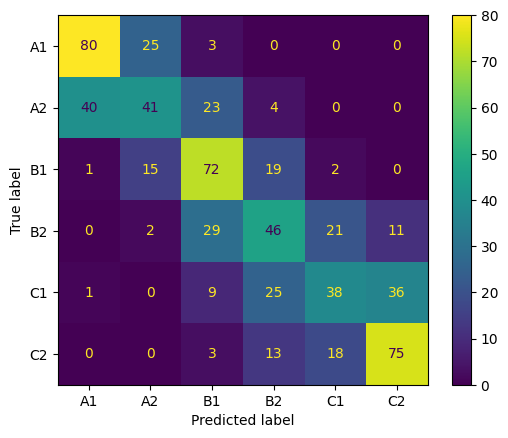

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["A1", "A2", "B1", "B2", "C1", "C2"])
disp.plot(cmap="viridis")
